In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
products_df = pd.read_csv('ratings_Electronics.csv')
products_df.columns = ['user_id', 'product_id', 'ratings','time_stamp']

In [3]:
products_df.head()

,user_id,product_id,ratings,time_stamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
products_df.shape

(7824481, 4)

In [5]:
products_df.drop('time_stamp', inplace=True, axis=1) #drop the timestamp column because it's not necessary for the analysis

In [6]:
products_df.head()

,user_id,product_id,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [7]:
products_df.isnull().sum()   # No null values present

user_id       0
product_id    0
ratings       0
dtype: int64

In [8]:
products_df.info() # No missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
user_id       object
product_id    object
ratings       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F80734B38>]],
      dtype=object)

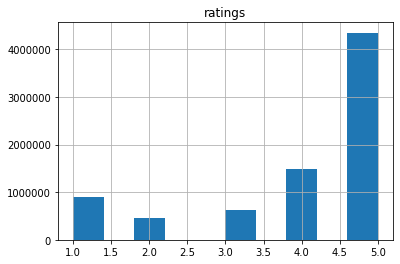

In [9]:
products_df.hist() 

##### From the above graph it is evident that users have given full rating (i.e 5) to majority products

In [10]:
products_df.describe()

,ratings
count,7.824481e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


##### 50  to 75 per cent of products have rating as 5

#### Take subset of dataset to consider users who have given 50+ ratings

In [11]:
user_count = products_df['user_id'].value_counts()

In [12]:
users_rated_morethan50products = products_df['user_id'].value_counts()[products_df['user_id'].value_counts() >=50].index

In [13]:
products_df = products_df[products_df['user_id'].isin(users_rated_morethan50products)]

In [14]:
products_df.shape

(125871, 3)

#### Due to memory constrains we will be using 10% of the above data for further analysis

In [15]:
sample_df = products_df.sample(12587,random_state=12) # taking 10 % of previous data for analysis

##### Spliting the data into test and train

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
train_data, test_data = train_test_split(sample_df, test_size = 0.30, random_state=3)

In [18]:
train_data_users = train_data['user_id'].unique()
print('No. of users in train set =',len(train_data_users))

No. of users in train set = 1520


In [19]:
train_data_products = train_data['product_id'].unique()
print('No. of products in train set =',len(train_data_products))

No. of products in train set = 6900


In [20]:
test_data_users = test_data['user_id'].unique()
print('No. of users in train set =',len(test_data_users))

No. of users in train set = 1340


In [21]:
test_data_products = test_data['product_id'].unique()
print('No. of products in test set',len(test_data_products))

No. of products in test set 3313


### Popularity based Recommender Model

In [22]:
#Get mean ratings for each product
product_mean_rating = pd.DataFrame(train_data.groupby('product_id')['ratings'].mean())

In [23]:
#Get the no of people who have rated that product as rating count
product_mean_rating['ratings_count'] = pd.DataFrame(train_data.groupby('product_id')['ratings'].count())

In [24]:
# Get the score of each product so that the highly rated product by many people has a higher score
product_mean_rating['score'] = product_mean_rating['ratings']*product_mean_rating['ratings_count']

In [25]:
# Get the sorted DataFrame of products having highest scores at the top 
top_products_train = product_mean_rating.sort_values(by='score',ascending=False)
top_train = top_products_train.head(10)

In [26]:
# Top 10 Predictions on the bases of train data
print('Top 10 Predictions on the bases of train data are')
print('')
print('#################################################')
print('')
print(top_train)

Top 10 Predictions on the bases of train data are

#################################################

             ratings  ratings_count  score
product_id                                
B0088CJT4U  4.000000             21   84.0
B004CLYEFK  4.666667             15   70.0
B007WTAJTO  5.000000             13   65.0
B00834SJNA  4.200000             15   63.0
B000N99BBC  4.769231             13   62.0
B002WE6D44  5.000000             12   60.0
B008DWCRQW  4.384615             13   57.0
B003ES5ZUU  5.000000             11   55.0
B009SYZ8OC  4.636364             11   51.0
B000QUUFRW  5.000000              9   45.0


In [27]:
# Perform the same analysis for test data
product_mean_rating = pd.DataFrame(test_data.groupby('product_id')['ratings'].mean())
product_mean_rating['ratings_count'] = pd.DataFrame(test_data.groupby('product_id')['ratings'].count())
product_mean_rating['score'] = product_mean_rating['ratings']*product_mean_rating['ratings_count']
top_products_test = product_mean_rating.sort_values(by='score',ascending=False)
top_test = top_products_test.head(10)

In [28]:
# Top 10 Predictions on the bases of train data
print('Top 10 Predictions on the bases of train data are')
print('')
print('#################################################')
print('')
print(top_test)

Top 10 Predictions on the bases of train data are

#################################################

             ratings  ratings_count  score
product_id                                
B005FYNSPK  4.833333              6   29.0
B008DWCRQW  3.625000              8   29.0
B0034CL2ZI  4.500000              6   27.0
B00829TIA4  4.166667              6   25.0
B004CLYEDC  4.600000              5   23.0
B00829TIEK  4.400000              5   22.0
B008ULPE70  4.400000              5   22.0
B000VX6XL6  5.000000              4   20.0
B000N99BBC  4.750000              4   19.0
B0081FLFQE  4.750000              4   19.0


### Collaborative Filtering model

In [29]:
from surprise import Dataset,Reader
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [30]:
reader = Reader(rating_scale=(1, 5))

e_prod_df = Dataset.load_from_df(sample_df[['user_id', 'product_id', 'ratings']], reader)

In [31]:
trainset, testset = train_test_split(e_prod_df,test_size=0.3, random_state=3)

#### A) User-User Based

In [32]:
model1 = KNNWithMeans(k=100, sim_options = {'name':'pearson_baseline', 'user_based':True})
model1.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [33]:
user_records = trainset.ur
user_records

defaultdict(list,
            {0: [(0, 4.0),
              (2332, 5.0),
              (2857, 5.0),
              (3373, 5.0),
              (3891, 5.0),
              (4090, 5.0),
              (4559, 5.0),
              (4966, 5.0),
              (3642, 2.0),
              (6578, 4.0),
              (3481, 4.0)],
             1: [(1, 5.0), (12, 5.0), (2232, 5.0), (3922, 5.0), (4884, 5.0)],
             2: [(2, 1.0),
              (161, 5.0),
              (303, 5.0),
              (1861, 5.0),
              (1867, 5.0),
              (6178, 4.0),
              (3142, 5.0)],
             3: [(3, 5.0), (2114, 5.0), (5498, 4.0), (5795, 5.0)],
             4: [(4, 3.0),
              (246, 5.0),
              (1328, 5.0),
              (4741, 4.0),
              (5143, 4.0),
              (5430, 5.0),
              (6730, 5.0)],
             5: [(5, 5.0),
              (3669, 5.0),
              (3900, 5.0),
              (3956, 4.0),
              (4404, 5.0),
              (4573, 5.0),


###### The output can be read as: 

1) The zero th user has given 5.0 rating to zero th product 

2) The zero th user has given 5.0 rating to 916 th product

and so on.....

In [34]:
item_records = trainset.ir
item_records

defaultdict(list,
            {0: [(0, 4.0), (135, 5.0), (12, 5.0)],
             1: [(1, 5.0)],
             2: [(2, 1.0), (389, 5.0), (370, 5.0), (1273, 5.0)],
             3: [(3, 5.0), (846, 3.0)],
             4: [(4, 3.0)],
             5: [(5, 5.0), (935, 5.0), (888, 5.0)],
             6: [(6, 2.0)],
             7: [(7, 4.0)],
             8: [(8, 5.0)],
             9: [(9, 1.0), (1084, 5.0), (138, 5.0), (17, 2.0)],
             10: [(10, 4.0),
              (54, 5.0),
              (202, 5.0),
              (859, 1.0),
              (379, 5.0),
              (888, 5.0)],
             11: [(11, 5.0)],
             12: [(1, 5.0)],
             13: [(12, 5.0), (424, 5.0), (129, 5.0), (1342, 5.0)],
             14: [(13, 4.0)],
             15: [(14, 4.0)],
             16: [(15, 5.0)],
             17: [(16, 5.0)],
             18: [(17, 3.0)],
             19: [(18, 2.0)],
             20: [(19, 5.0)],
             21: [(11, 4.0), (774, 5.0)],
             22: [(20, 5.0), (720

###### The output can be read as: 

1) The zero th product was given 5.0 rating by zero th user 

2) The zero th product was given 5.0 rating by 664 th user

and so on.....

In [35]:
test_pred = model1.test(testset)
test_pred

[Prediction(uid='A3EX8ZFNVDHGPM', iid='B00190UAIC', r_ui=5.0, est=4.267536889897843, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ALNE7Q71JFC0F', iid='B008EQZ25K', r_ui=5.0, est=4.267536889897843, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1WF4QNIE2Z3I7', iid='B00ARB5E8U', r_ui=5.0, est=4.333333333333333, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2U3OEIK1CUPIK', iid='B00H1YYCWA', r_ui=5.0, est=4.267536889897843, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1O229NVVDJUX2', iid='B00009XVCZ', r_ui=4.0, est=4.267536889897843, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1RPTVW5VEOSI', iid='B0009KVU8W', r_ui=4.0, est=4.444444444444445, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A23ZXHFLC6TBLD', iid='B009D79VH4', r_ui=5.0, est=4.333333333333333, d

#### B) Item-Item Based

In [36]:
model2 = KNNWithMeans(k=10, sim_options = {'name':'pearson_baseline', 'user_based':False})
model2.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [37]:
test_pred = model2.test(testset)
test_pred

[Prediction(uid='A3EX8ZFNVDHGPM', iid='B00190UAIC', r_ui=5.0, est=4.267536889897843, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='ALNE7Q71JFC0F', iid='B008EQZ25K', r_ui=5.0, est=4.267536889897843, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1WF4QNIE2Z3I7', iid='B00ARB5E8U', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2U3OEIK1CUPIK', iid='B00H1YYCWA', r_ui=5.0, est=4.267536889897843, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1O229NVVDJUX2', iid='B00009XVCZ', r_ui=4.0, est=4.267536889897843, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1RPTVW5VEOSI', iid='B0009KVU8W', r_ui=4.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A23ZXHFLC6TBLD', iid='B009D79VH4', r_ui=5.0, est=5, details={'actual_k': 0, 'was_impossible': False

### Model Evaluation

In [38]:
print('Collaboative Filtering User-User Model: Test_Set')
accuracy.rmse(test_pred, verbose=True)

Collaboative Filtering User-User Model: Test_Set
RMSE: 1.1236


1.1236450014972343

### Top k (k=5) Recommendations for each user

In [39]:
top_pred = pd.DataFrame(test_pred, columns= ['u_id','i_id','actual','estimated','details'])
t = top_pred.groupby('u_id')

In [40]:
for i in top_pred['u_id'].unique():
    print('########################################')
    print('The top K recommendations for user',i,'are')
    print(t.get_group(i)['i_id'])
    print('########################################')    
    print('')

########################################
The top K recommendations for user A3EX8ZFNVDHGPM are
0       B00190UAIC
1114    B002JC8MAM
2931    B002DSMNES
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user ALNE7Q71JFC0F are
1       B008EQZ25K
232     B00CNZTPGA
2137    B001AZV0BW
3493    B001E1Y5O6
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1WF4QNIE2Z3I7 are
2       B00ARB5E8U
2555    B002NUCJ5E
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A2U3OEIK1CUPIK are
3       B00H1YYCWA
387     B001BP1YEE
416     B000M90EF0
2390    B003JEZXA6
2412    B000VUIXO4
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1O229N

The top K recommendations for user A376OJHLE6SU9Q are
127     B002TLSOGK
317     B0012LKJ48
1198    B008ULPBJG
1261    B00934CQ56
1262    B002W3IXZW
1778    B0088CJT4U
2295    B00CO0DE0W
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1EQ5D5JRSW23K are
128     B004Q9T7KK
304     B002WE6D44
1124    B00EAR8S76
1129    B0074BW614
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3K91X9X2ARDOK are
130     B005MJU1DA
1032    B00AGBVVI8
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3V5F050GVZ56Q are
132     B002Y6CJJ8
1300    B001QUA6R0
3034    B00GPK9NSY
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A2SKEQT0W

########################################

########################################
The top K recommendations for user A3QQCEQ33O0GJU are
213     B005IQGUHS
2160    B000O8I474
2668    B0062FZ3QI
2776    B004SUO068
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A2TA40MV2H4O6F are
214     B003E2XYVI
736     B008GZU8AI
3126    B003809LBS
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user AW6FQE5QRF2LM are
215     B0013LQD7Y
2392    B00END91QE
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A20OBCQWBKCGZT are
216     B002IC0YLS
2708    B001PK6C7Y
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3MV1KKHX51FYT are
218

The top K recommendations for user A1B8EJQU73YGL9 are
335     B00AE00A0G
675     B002UV4NQO
741     B00834SJNA
1424    B002U4QIBY
2131    B007FMG6D6
3149    B005GI2VMG
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A22CW0ZHY3NJH8 are
336     B00GR3FMXE
520     B00DTZYHX4
1364    B003ES5ZUU
1410    B00GGNDX1I
1528    B00062GJ8E
1739    B000V0IE66
2529    B006RG23JC
3449    B00ISFNSBW
3511    B005UA3I72
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3SL0HA6422W4M are
337     B00DHWUZD0
466     B00ENZRS76
511     B008MB70TI
2004    B0067Z6BNC
2216    B0060HGVGY
3475    B00EZAYELC
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A2PL06HW6KZH2 are
338     B00H8O8D96
3771    B0026PTO1I
Name: i_id, dtype: ob

469     B00DJNCS6O
1872    B00JX1ZS5O
2210    B005FYNSPK
2854    B00FDK4GXY
2964    B007O0ZJKA
3537    B00HPPI0W8
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A132ETQPMHQ585 are
471     B003MX4D0U
2369    B006RAF0NY
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user ANYC38I00IRVK are
472     B0007N55NW
618     B000S5Q9CA
2012    B00DV2QX3M
2211    B0053VZUW4
2232    B00A83I8G2
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3SQCTNYQFVBWM are
473     B001IBMLKM
1698    B00CRY250U
3315    B006EK9O4I
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A267FU71Z01CIH are
474     B005I6EU48
833     B004SGJCCO
1893   

The top K recommendations for user A2V1J3JT5OOZFO are
622     B00000J3UJ
3571    B002GR1YZ0
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1R3GN9MEJFXM3 are
623     B006GWO7UA
3565    B004ULQITW
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A2T24Z5QP2OMXU are
628    B0041OQKIC
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3D2VIUT2HWP0Z are
630    B00EXK14S0
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A25UZ7MA72SMKM are
631    B000G16P9I
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user AA3FTJYJYX55C are
63

Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3CLWR1UUZT6TG are
742     B007J4BOWI
3151    B00BQ5KHJW
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user ARX7Z3NI6O0F7 are
744     B0058BUC2W
1307    B001G7PMMW
1378    B00066EK40
2286    B005F30IJK
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3PJJTAKISAFI9 are
745     B0073FE1F0
2645    B00824948U
3445    B000P76KXY
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user AV8MDYLHHTUOY are
746    B0032HMSIU
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A5GPH59NDWJRB are

Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3PGVJF37JSHFO are
871     B002V88HFE
1710    B0035548TQ
3005    B0007U9SOC
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A4IL0CLL27Q33 are
876     B003CP0K9Q
2001    B009C98NQS
2072    B009QV72VY
2490    B0060DVXZC
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A2GMZZ6TDYOHY7 are
878    B0015K9320
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A15CL28ALB7MTZ are
879     B002K9IHGI
3251    B0012H6H7A
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A10ZFE6YE0UHW8 a

The top K recommendations for user A1TQZUSOU22E9M are
1076    B004TU1SX0
1895    B0031RG2JC
2818    B00G28IP38
3004    B001OI2YZQ
3558    B00005LENO
3650    B009M27MB2
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user AS7J4952JB5XR are
1077    B00BAEJWIG
2539    B000S5Q9CA
2582    B0027VT6Q4
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user AAEVGE52KL0DJ are
1078    B00D1KWRMA
3133    B00B8L36A6
3166    B004CLYEI2
3531    B005K6G7BU
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1BT6TL7UCIC5Y are
1080    B000PEOETO
1726    B00E3AKFA8
2630    B00F0R9V76
3023    B005G0CUP2
3657    B00DIOALPE
Name: i_id, dtype: object
########################################

########################################
The top 

The top K recommendations for user A3S3VSXEFXBMRC are
1259    B001TH7GUU
1864    B0038A4DGQ
1960    B00095M5EA
3058    B0046RE21G
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1Z4GII5CHCDG7 are
1263    B00834SJNA
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3Q6ZPW60CVF2L are
1264    B000OOZVD8
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A4S2WAQVQR6PI are
1265    B004LXJXSW
1672    B0051V31UO
2489    B0032HMSIU
2538    B002RCNX8K
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A35Q0RBM3YNQNF are
1266    B0079UAT0A
Name: i_id, dtype: object
########################################

##################

Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1FMU4CJLIDHR9 are
1464    B002PHM0HW
3157    B00B7E1D7W
3666    B0054JJ0QW
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A2EF8N7ZE7ONWX are
1467    B0002SQEWS
2302    B000M4J2LM
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3S0EHEIR52HP1 are
1470    B008Y25BGE
1519    B002VG39BI
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A11KQADBYE0UZL are
1471    B0096YOQRY
3017    B000RK89M4
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3KZEGBTPH6MMF are
1474    B004YL

Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A365PBEOWM7EI7 are
1736    B001MSU1FS
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user ASJSX783R5HTZ are
1737    B004G3PANY
2503    B001TH7GUU
2551    B008U2HTIQ
2723    B000BRJDB4
3487    B000HLZXH2
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A2WXURU33RBGQS are
1743    B002JAPQ4O
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user AFR9GYKAHM37U are
1744    B0035K6H2C
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1BBYSMT9YCODI are
1745    B004Q3R9AQ
Name: i_id, dtyp

The top K recommendations for user A3E9O1VNJ3U324 are
2058    B0067S8IZ8
2523    B00C6OBW1E
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A6KL17KKN0A5L are
2060    B0035LBRJO
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3EQQHWJ1EEYEU are
2063    B00834SJSK
3221    B000LRMS66
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3CFU12GS5CZCN are
2065    B0065KY4C4
3182    B003ELYQGG
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user AX05DBU8IRUWY are
2068    B00B9KOCYA
3470    B00ETH7ERM
3616    B008UZNB44
Name: i_id, dtype: object
########################################

######################################

Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A3FKQQTSMHOCE0 are
2428    B00006I53Z
3144    B003QKBVYK
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1BZIM4WGZ6DZP are
2430    B001TGNGHS
3626    B007B60SCG
3687    B003MVZ60S
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1SX9PHJWTDMF9 are
2431    B00568BV68
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A11D1KHM7DVOQK are
2438    B0006BFCN8
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1BXVZSQOJE6UE are
2445    B00931DHKM
Name: i_id, dtype: object
#######

Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A2RTVGR9B1M600 are
2891    B00EXPSC7G
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A5Q1FK0FWU7DH are
2911    B0010Z294O
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user AQSV34W54L0VO are
2936    B009QXFFDO
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A14JBDSWKPKTZA are
2946    B004CLYEDC
3163    B000068U2J
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A356RFKNIG043B are
2947    B003VAGXZC
Name: i_id, dtype: object
########################################

#####

Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A319Y83RT0MRVR are
3357    B00HSQAIQU
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A1F1A0QQP2XVH5 are
3362    B004CRSLGW
3733    B005WY3TD4
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user A2JKM8KF3296CW are
3364    B002MCZJ78
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user AKSQNMIKOU01H are
3369    B0042X9LC4
Name: i_id, dtype: object
########################################

########################################
The top K recommendations for user AYGEKID3G7DPW are
3370    B00EL8XQ0S
Name: i_id, dtype: object
########################################

#####

### Summary

1) In popularity based recommendation system the model predicts the most frequently purchased and highly rated products depending on the purchase history of the item, therefore it is not personalised,it will always give the same set of products for every user.

2) In User-User collaborative filtering the ratings given by users to a perticular product and their purchase history is comapared with other users, depending upon these, similarity between users is decided and the recommendations are provided accordingly, this is a more personalised model than the popularity based model because the users will get recommendations according to their liking.

3) In Item-Item collaborative filtering the features of products purchased by user are compared with the available products and the most similar products are then recommemded to the user, this model too provides with personalised recommendations.